# 1. Data Loading

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [15]:
file_path = 'data.csv'
data = pd.read_csv(file_path)
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


# 2. Data Exploration

In [16]:
data.isnull().sum()
data.describe()
data.dtypes
data['fail'].value_counts()

fail
0    551
1    393
Name: count, dtype: int64

# 2a. Correlation Heatmap

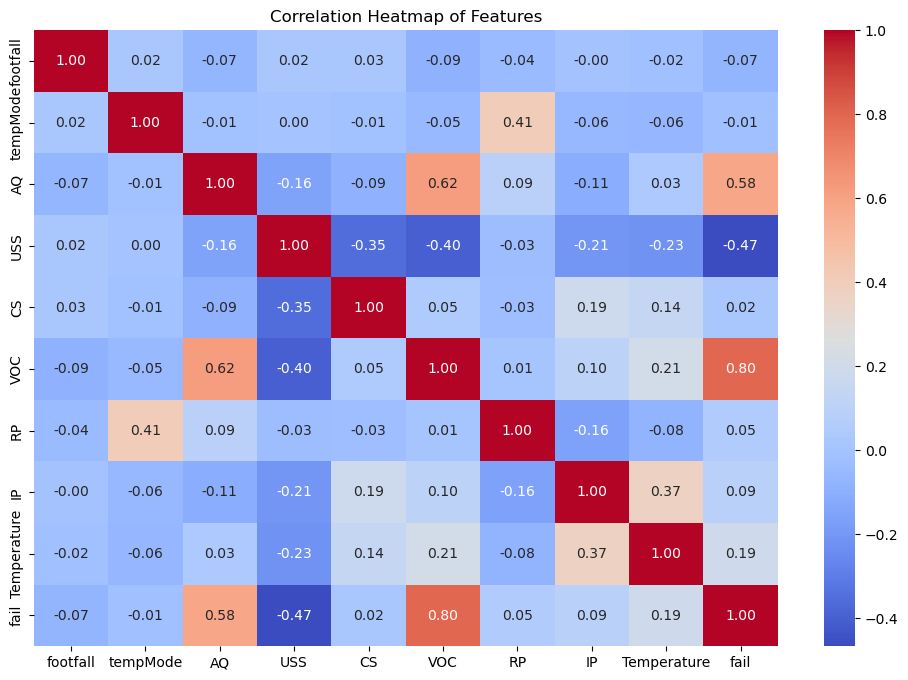

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# 3. Data Preprocessing

In [18]:
X = data.drop(columns=['fail'])
y = data['fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Building

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# 5. Model Evaluation

In [20]:
y_pred = rf_model.predict(X_test_scaled)

In [21]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print(f"\nAccuracy Percent:{round(accuracy_score(y_test, y_pred)*100,2)}")

Confusion Matrix:
 [[90 12]
 [11 76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189


Accuracy Score: 0.8783068783068783

Accuracy Percent:87.83


# 5a. Feature Importance Plot

In [22]:
feature_importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

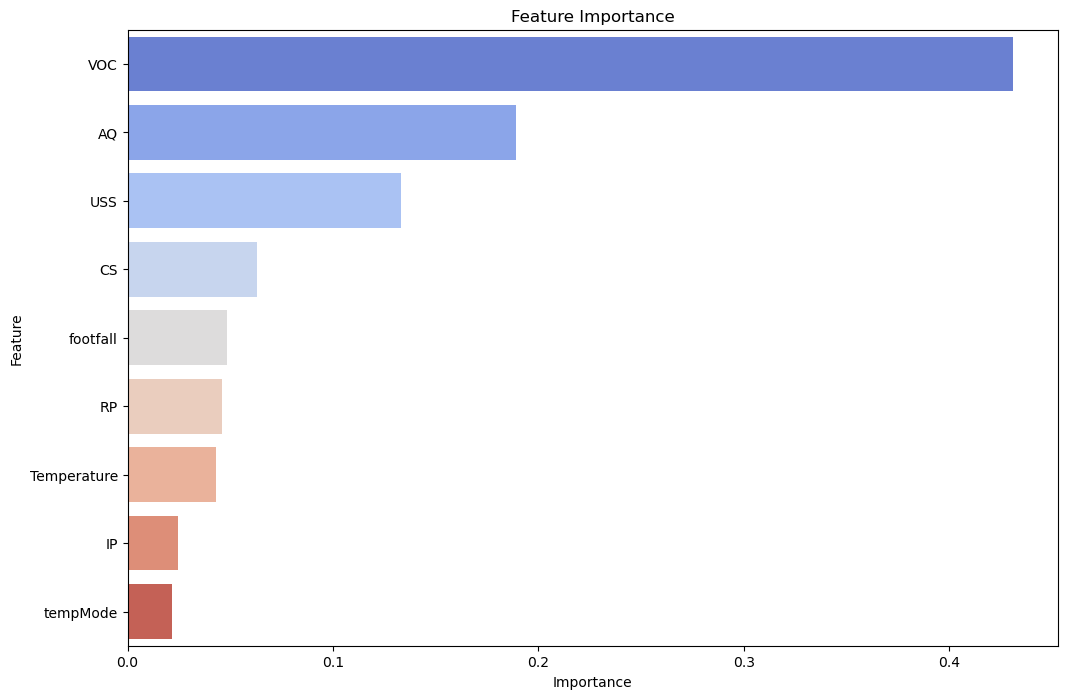

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[indices], y=features[indices], hue=features[indices], dodge=False, palette='coolwarm', legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 6. Predictions

In [24]:
new_data = pd.DataFrame({
    'footfall': [100],
    'tempMode': [2],  # Corrected to match the training feature name
    'AQ': [45],
    'USS': [0.5],
    'CS': [0.1],
    'VOC': [200],
    'RP': [1500],
    'IP': [30],
    'Temperature': [85]
})

In [25]:
new_data_scaled = scaler.transform(new_data)
prediction = rf_model.predict(new_data_scaled)
print("Prediction (1 for failure, 0 for no failure):", prediction[0])

Prediction (1 for failure, 0 for no failure): 1
